<b>Customer Categorization using K Nearest Neighbors </b>

A KNN classifier is used to categorize customers from a telecomms dataset. Hyperparameter K is found by multiple training cycles over a range of K values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
ds.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
ds.shape

(1000, 12)

In [4]:
ds.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


'custcat' is our target variable. We will analyze the dataset's correlation coefficients to find the training features for our classification model.

In [5]:
ds['custcat'].unique()

array([1, 4, 3, 2], dtype=int64)

In [6]:
ds['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

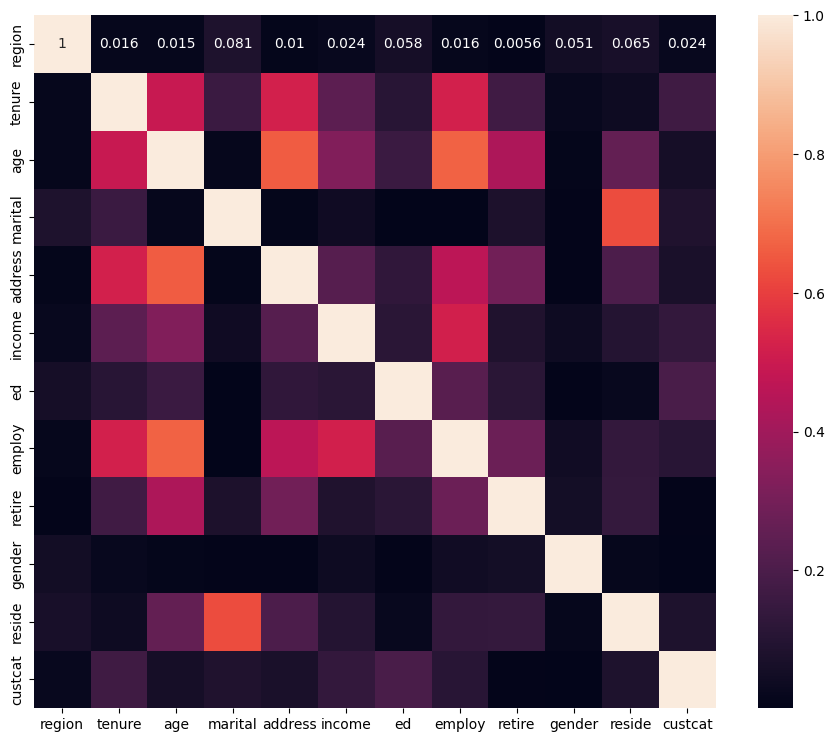

In [7]:
import seaborn as sns
plt.figure(figsize=(11,9))
sns.heatmap(ds.corr().abs(), annot=True)

'tenure' and 'ed' have relatively the brightest squares for the 'custcat' correlation values. We will consider them for training. Also, we will check out correlation of our target variable with 'employ' and 'income' since they're ambiguously bright.

In [8]:
ds['custcat'].corr(ds['employ'])

0.11001069597646508

In [9]:
ds['custcat'].corr(ds['income'])

0.13452539502269453

Hence, we will also consider 'income' for training.

In [10]:
# Training features
X = np.array(ds[['tenure','ed','income']])
X

array([[ 13.,   4.,  64.],
       [ 11.,   5., 136.],
       [ 68.,   1., 116.],
       ...,
       [ 67.,   5., 944.],
       [ 70.,   2.,  87.],
       [ 50.,   3.,  39.]])

In [11]:
# Target variable
Y = np.array(ds['custcat'])
Y[:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [12]:
# Normalising training data

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X

array([[-1.055125  ,  1.0877526 , -0.12650641],
       [-1.14880563,  1.9062271 ,  0.54644972],
       [ 1.52109247, -1.36767088,  0.35951747],
       ...,
       [ 1.47425216,  1.9062271 ,  8.09851297],
       [ 1.61477311, -0.54919639,  0.08846569],
       [ 0.67796676,  0.26927811, -0.36017173]])

In [13]:
# Splitting into training data and testing data

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=4)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((700, 3), (700,), (300, 3), (300,))

Now we will create and train a KNN classifier. The hyperparameter K has to be determined before we definitively use our model. Thus, we will check the accuracy score (ie. the Jaccard Index), over a range of values of K and pick the most accurate one.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

jacc = []

for k in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=k).fit(xtrain, ytrain)
    yhat = model.predict(xtest)
    jacc.append(accuracy_score(yhat, ytest))

jacc

[0.32,
 0.3433333333333333,
 0.38,
 0.35333333333333333,
 0.36,
 0.4066666666666667,
 0.38333333333333336,
 0.38333333333333336,
 0.3933333333333333]

Text(0, 0.5, 'Jaccard score')

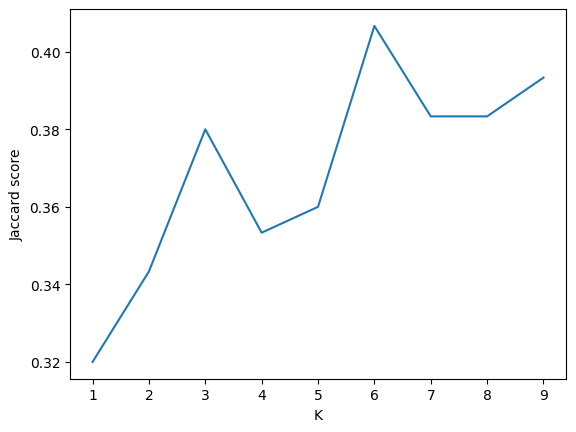

In [15]:
plt.plot(range(1,10), jacc)
plt.xlabel('K')
plt.ylabel('Jaccard score')

In [16]:
# Maximum score

max(jacc)

0.4066666666666667

In [17]:
# Best hyperparameter value

k_best = np.argmax(jacc) + 1
k_best

6

Best value of K is 6, yielding an accuracy score of 0.41 on the test data. Hence, we will use k = 6 for model deployment.

In [18]:
model = KNeighborsClassifier(k_best).fit(xtrain, ytrain)
yhat = model.predict(xtrain)
print("Accuracy on training data:", accuracy_score(yhat, ytrain))

Accuracy on training data: 0.5442857142857143
